# BUSINESS PROBLEM
#### Rirko  has decided to venture in to the field of real estate constultancy that will help  buyers to get houses  and sellers to get the right price for their houses,as a data scientist I have been tasked to come up with insights that will assist the firm know the best prices based on different aspects or characteristics of the houses available.In order to come up with clear insights that will have impact ,I will apply my analysis based on EDA,Linear regression and Multiole regression modeling.I came up with the following questions to help  guide me during my analysis.The aim of this project is to develop a multiple regression model than can predict a house's price 
 - which variable/aspect has the highest  impact on price?
 - which other variables impact our prices?
 -  which model gives the highest variation/accuracy that will help us predict prices in the future?

# DATA UNDERSTANDING
## The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below.

- Column Names and descriptions for King County Data Set
- id - unique identified for a house
- dateDate - house was sold
-  pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
-  sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
-  sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Importing various libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading and  viewing our data

In [46]:
#loading our 
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### checking the datatypes and the shape of our data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Our data contains 21597 entries and 20 columns.Our data type is mainly made up of numerical and categorical variables

## DATA CLEANING

#### checking for missing values

In [48]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [49]:
df.isna().sum()/len(df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

####  waterfront,yr_renovated,view contain missing values,we will handle them individually

#### Dropping yr_renovated because 95% contains 0 and its contains almost 15% of missing values hence its justifiable to drop the column

In [50]:
df.drop('yr_renovated',axis=1,inplace=True)

In [51]:
df['waterfront'].isna().sum()
df['waterfront'].value_counts()
df['waterfront'].fillna('NO',inplace=True)
df['waterfront'].isna().sum()

0

#### Creating a new integer column based on grade, because that column contains some numerical features

In [52]:
df["grade_num"] = df["grade"].str.split().apply(lambda x: x[0])
df['grade_num'] = df['grade_num'].map(int)

# Checking for distributions of the variables

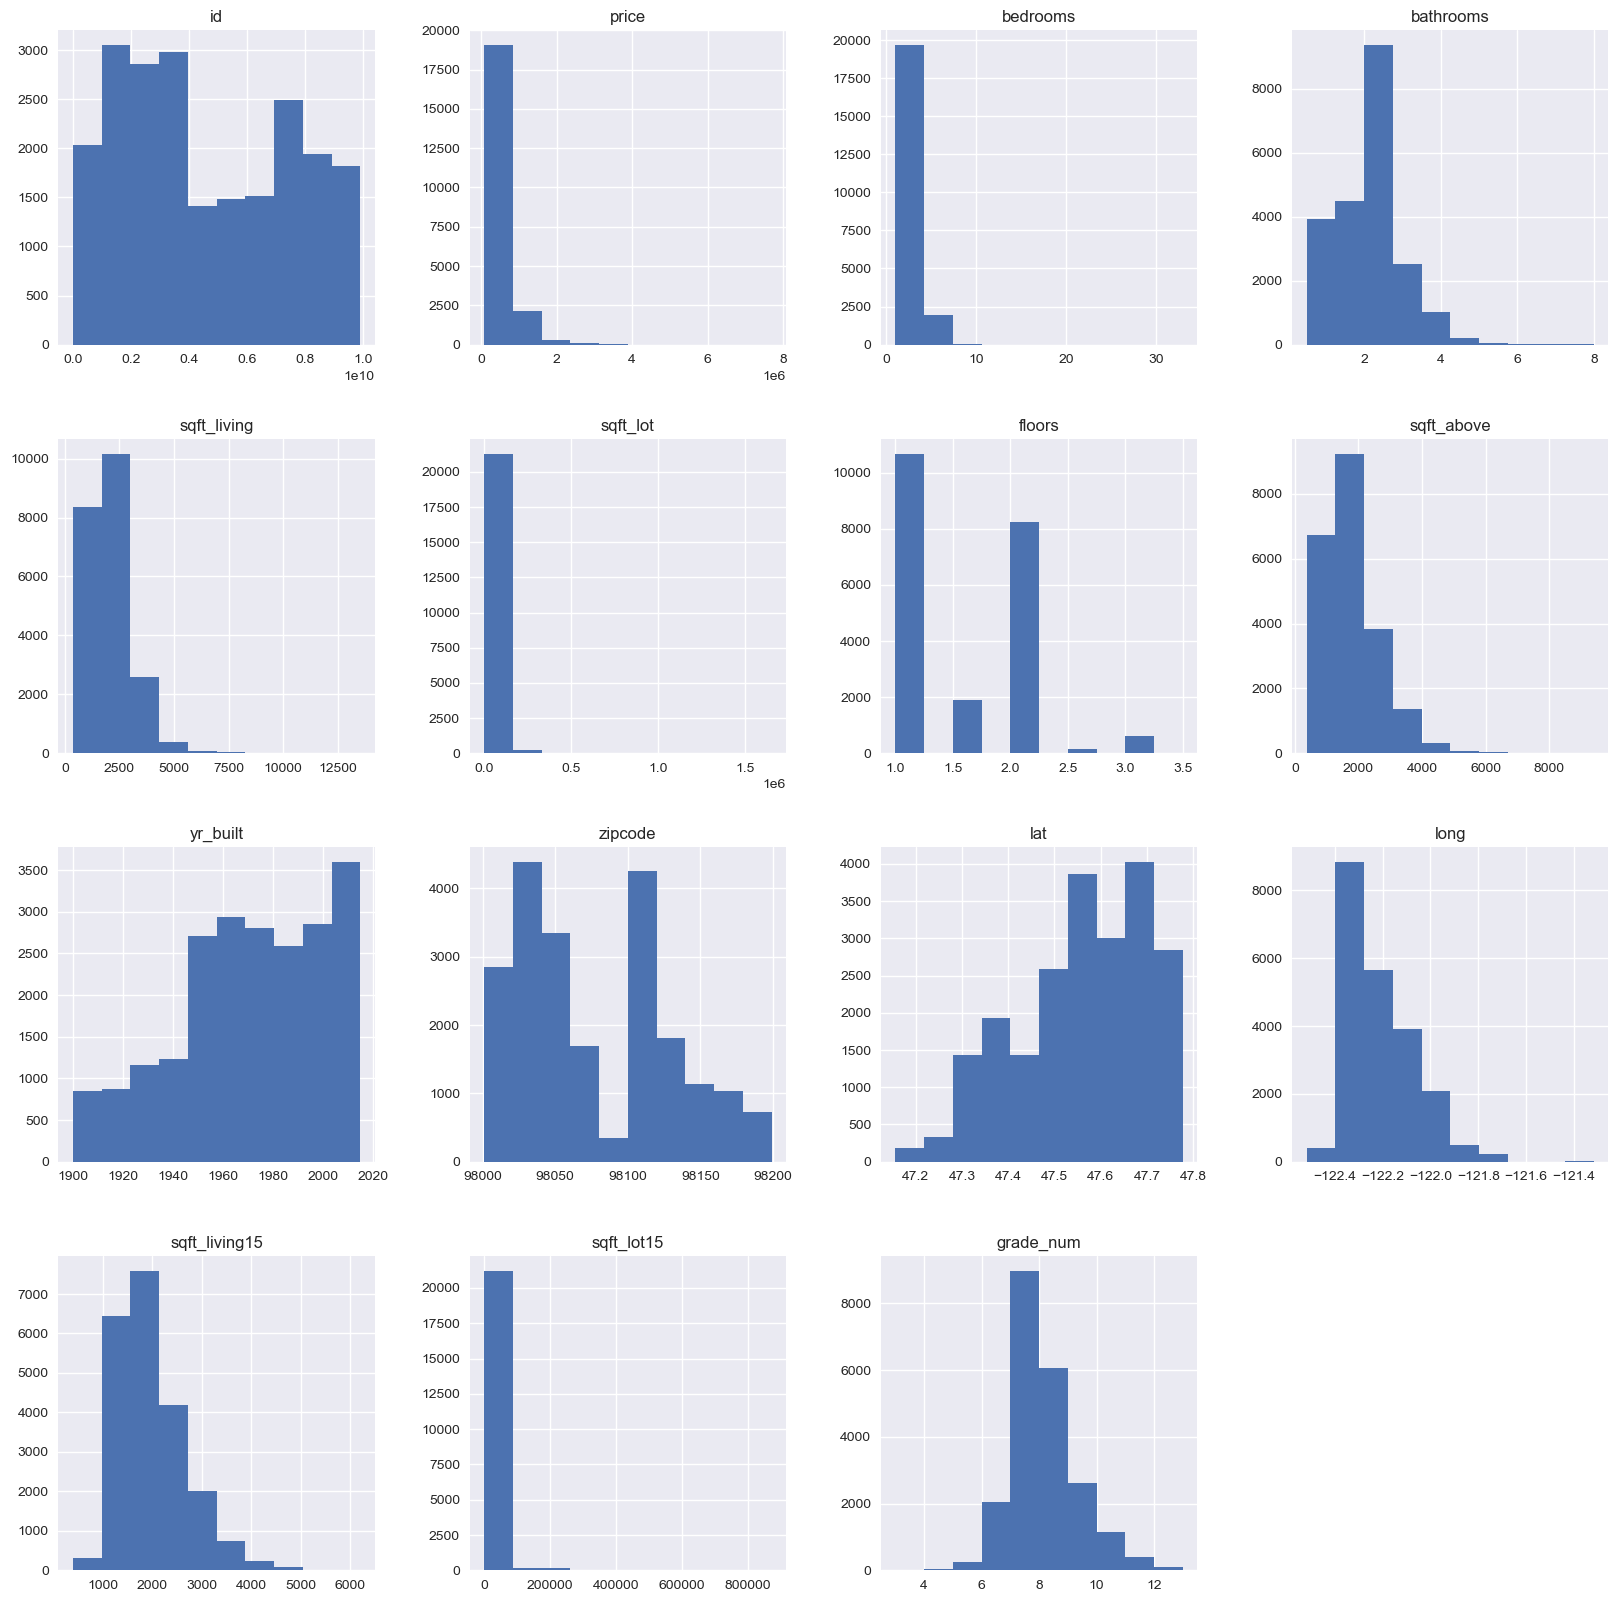

In [53]:
#distributions
df.hist(figsize=(20,20));

### Many of the variables do not follow a normal distribution, and the scales are dramatically different for some variables. 

In [54]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,7.657915
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,1.173200
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,3.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,7.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,7.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,8.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,13.000000


looking at the histograms of all features and the statistics summary table above, there are a lot of unrealistic outliers in the dataset. For instance, the number of bedrooms run to more than 30 bedrooms to the sale price of the house run to more $8 millions dollars. Therefore, we omit theses outliers for more accurate final results.
The major outlier in 'bedroom' is dropped and the 'price' is cut to $950,000 where the graph starts to skewed.

In [55]:
df = df.drop(df.index[df['bedrooms'] == 33]).copy()
df = df.loc[(df['price'] <= 950000)]

### Checking for duplicates and dropping our duplicates

In [56]:
len(df[df['id'].duplicated()])

169

In [57]:
df.drop_duplicates(subset='id', inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19704 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19704 non-null  int64  
 1   date           19704 non-null  object 
 2   price          19704 non-null  float64
 3   bedrooms       19704 non-null  int64  
 4   bathrooms      19704 non-null  float64
 5   sqft_living    19704 non-null  int64  
 6   sqft_lot       19704 non-null  int64  
 7   floors         19704 non-null  float64
 8   waterfront     19704 non-null  object 
 9   view           19647 non-null  object 
 10  condition      19704 non-null  object 
 11  grade          19704 non-null  object 
 12  sqft_above     19704 non-null  int64  
 13  sqft_basement  19704 non-null  object 
 14  yr_built       19704 non-null  int64  
 15  zipcode        19704 non-null  int64  
 16  lat            19704 non-null  float64
 17  long           19704 non-null  float64
 18  sqft_l

In [59]:
df.to_csv('cleaned_kc_house.csv')

 ## Checking Correlations and Multicollinearity
#### We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model,we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

<AxesSubplot:>

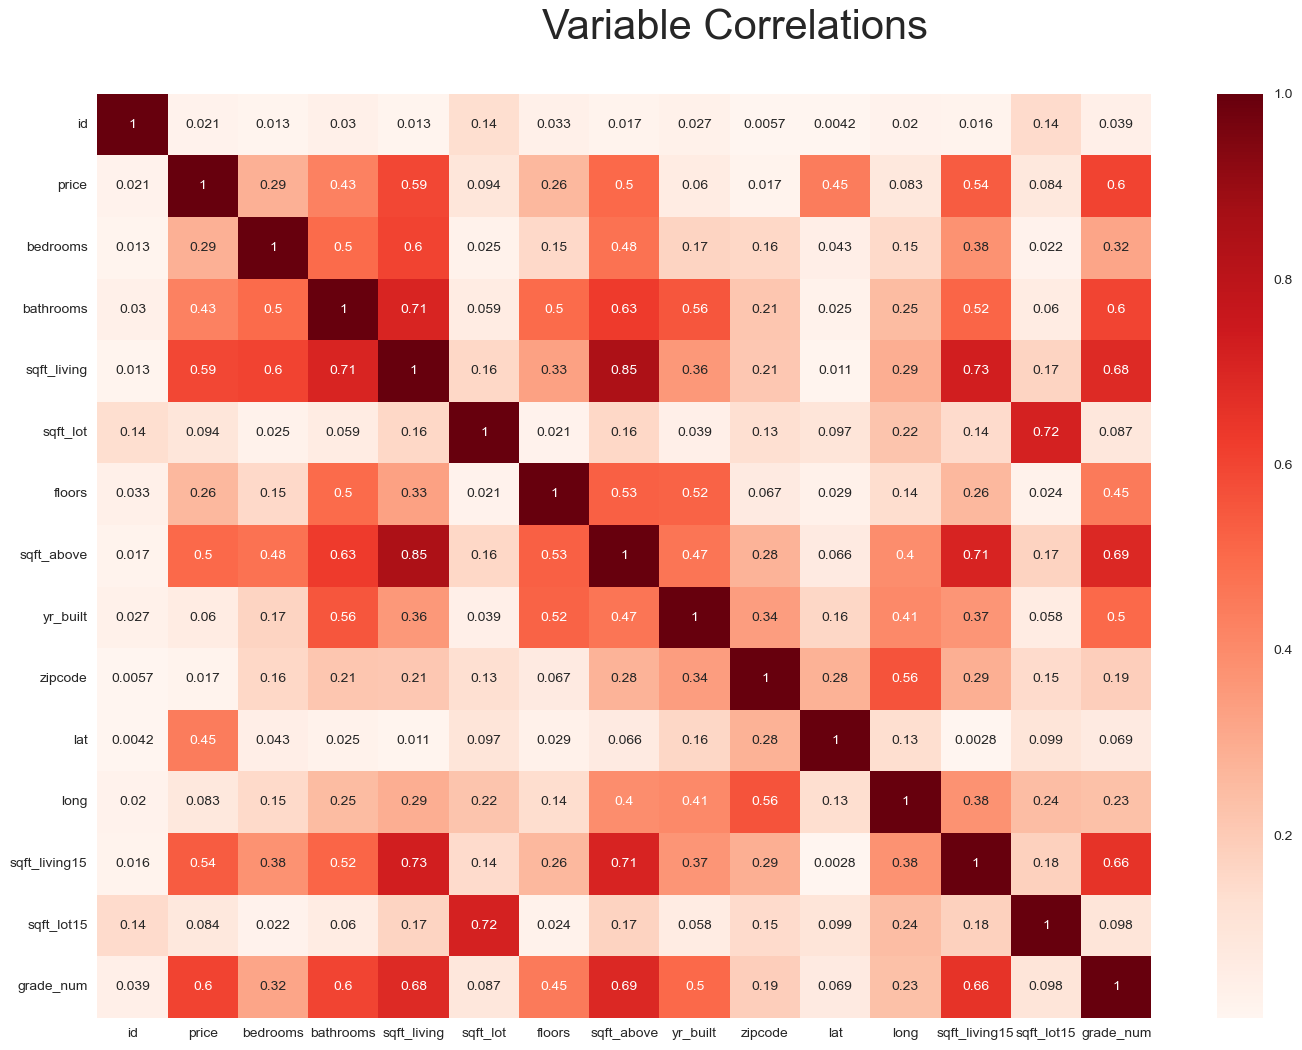

In [60]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [61]:
corr = df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'price']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
16,price,price,1.000000
29,price,grade_num,0.604998
19,price,sqft_living,0.592449
27,price,sqft_living15,0.539434
22,price,sqft_above,0.502177
25,price,lat,0.445195
18,price,bathrooms,0.428647
17,price,bedrooms,0.286811
21,price,floors,0.263328
20,price,sqft_lot,0.093538


### we can see above the most correlated variables with price

In [62]:
corr = df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Feature_1', 'level_1':'Feature_2', 0:'Correlation_Values'})
corr = corr.loc[corr['Feature_1'] != corr['Feature_2']]
corr.loc[corr['Correlation_Values'].abs() > 0.7].sort_values(by = 'Correlation_Values', ascending = True)

,Feature_1,Feature_2,Correlation_Values
49,bathrooms,sqft_living,0.707394
63,sqft_living,bathrooms,0.707394
117,sqft_above,sqft_living15,0.708771
187,sqft_living15,sqft_above,0.708771
88,sqft_lot,sqft_lot15,0.715808
200,sqft_lot15,sqft_lot,0.715808
72,sqft_living,sqft_living15,0.728237
184,sqft_living15,sqft_living,0.728237
67,sqft_living,sqft_above,0.846730
109,sqft_above,sqft_living,0.846730


### we can see that the sqft_living ansqdt_living15, causes a high multicollinearity among variables

## EDA ANALYSIS OF VARIOUS VARIABLES

### Distribution of price based on Grade

Text(0.5, 1.0, 'Average Price of Home Based onGrade')

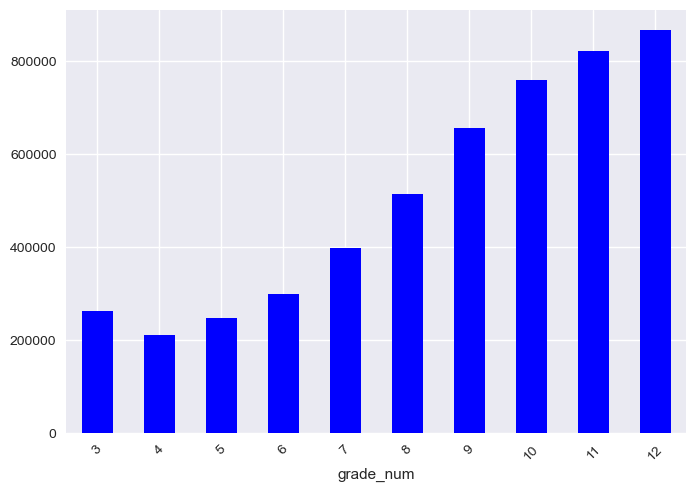

In [63]:
x = df.groupby(['grade_num'])['price'].mean().plot(kind = 'bar', color='blue')
ax.set_xlabel('Grade of Home', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylabel('Average Price of Home Sold (USD)', fontsize=12)
ax.set_title('Average Price of Home Based onGrade')

 We can see that as the grade of the house increases the price of the  house increases 

### Relationship between price and sqft living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

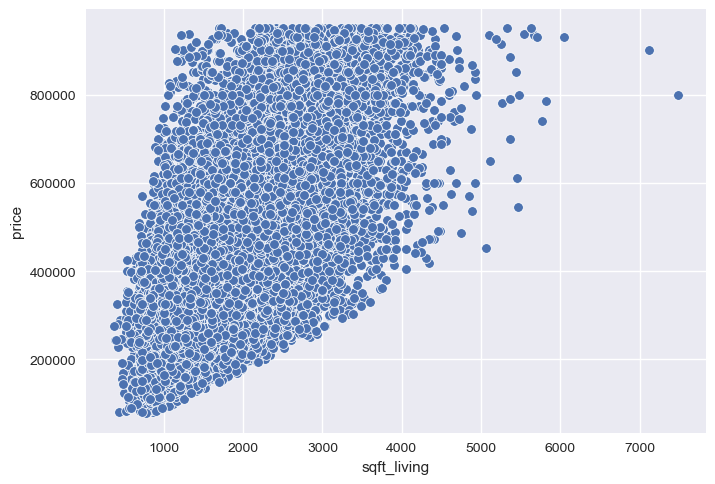

In [64]:
sns.scatterplot(data=df,x='sqft_living',y='price')

We can see that prices and sqft_living have a good relationship  hence and increase in sqft_living will have a major impact on price

## Distribution between price and bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

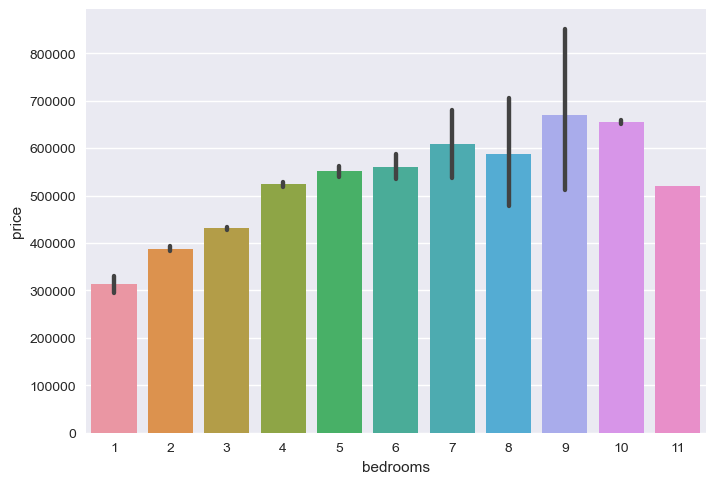

In [65]:
sns.barplot(data=df,x='bedrooms',y='price')

We can see that as the number of bedrooms increases the price of the house increases,but there is no clear insights so we will need  to investigate more to get clear relationship

# MODELLING

### Checking the normality our  target variable which is the price column.We will use a  KDE plot to check the  normality

Text(0.5, 1.0, 'Distribution of price ')

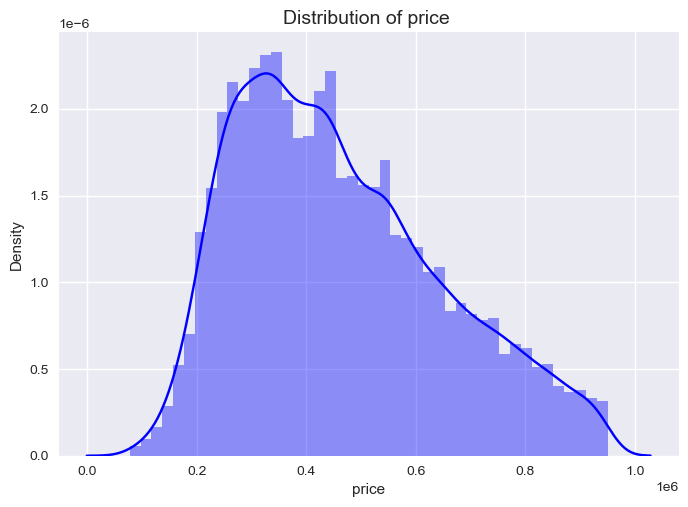

In [66]:
## looking for normality of our target price
sns.distplot(df['price'], kde=True, color="blue")
plt.title('Distribution of price ', fontsize=14)
## it is not normal

From the KDE plot above, it is clearly not a perfect normal distribution. Therefore, we need to transform it by using log transformation.

In [67]:
df['log_price'] = np.log(df['price'])

Text(0.5, 1.0, 'Distribution of log-transformed price with KDE plot')

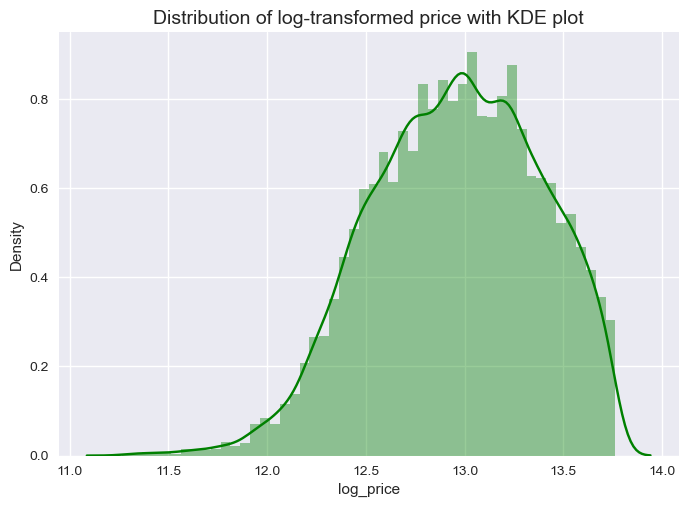

In [68]:
# Check distribution again with KDE plot
sns.distplot(df['log_price'], kde=True, color="green")
plt.title('Distribution of log-transformed price with KDE plot', fontsize=14)

###  Baseline linear regression model

we will use the price and grade to create our baseline model,since the grade is highly correlated with price.From our baseline model we will improve our model to predict correct prices

In [69]:
##linear regression
import statsmodels.api as sm
#
X_baseline=df[['grade_num']]
y=df['log_price']

In [70]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:17   Log-Likelihood:                -6832.6
No. Observations:               19704   AIC:                         1.367e+04
Df Residuals:                   19702   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0326      0.019    595.133      0.000      10.996      11.069
grade_num      0.2567      0.002    104.599      0.000       0.252       0.261
==============================================================================
Omnibus:                       73.240   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.476
Skew:                          -0.114   Prob(JB):                     1.35e-15
Kurtosis:                       2.824   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
baseline_results.resid.abs()
mae = baseline_results.resid.abs().sum() / len(y)
mae

0.2776554803625437

 our  model explains about 36% of the variations of price of houses ,which is not that high.The skewness is negative hence our baseline model is not effecient ,hence we need to improve our model

## Checking if our baseline follows the assumptions of a regression model

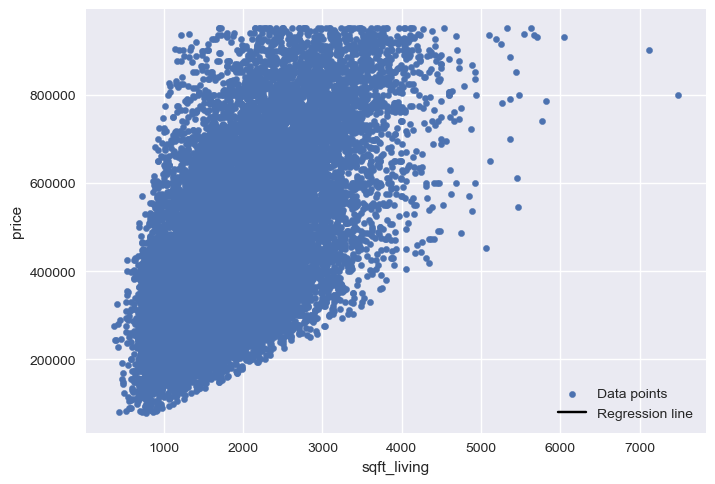

In [72]:
fig,ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();




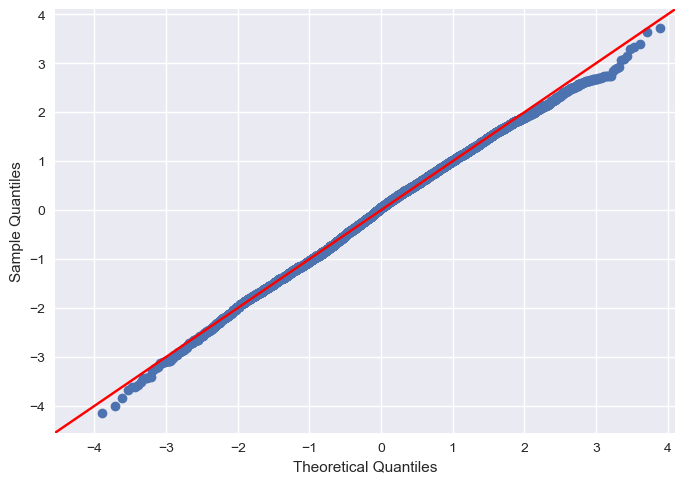

In [73]:
from scipy import stats
baseline_results.resid
sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

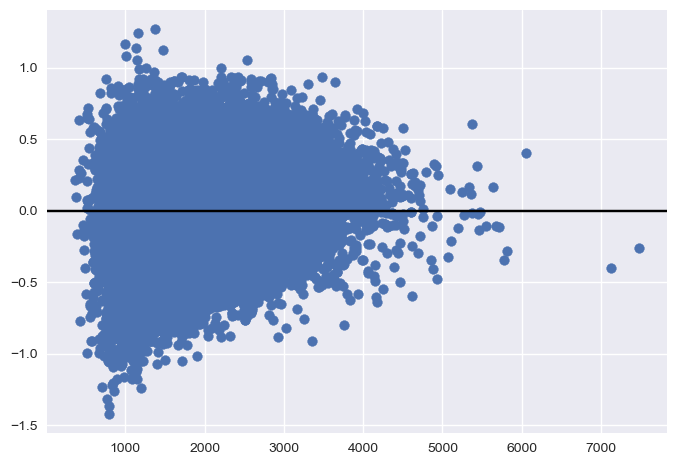

In [74]:
plt.scatter(df["sqft_living"], baseline_results.resid)
plt.axhline(y=0, color="black")
plt.show()

We can see from the QQplot,residual plo and regression plot that our  baseline model follows assumption of a regression model

## MODEL 2
### we plot a  multiple regression  among the most correlated variables with price

In [75]:
##model using the most correlated variables
#linear regression
import statsmodels.api as sm
#
X_2=df[['grade_num','sqft_living','sqft_above','lat','sqft_above','bathrooms','bedrooms','floors']]
y=df['log_price']
model1= sm.OLS(y, sm.add_constant(X_2))
model_results = model1.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4805.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:22   Log-Likelihood:                -1370.2
No. Observations:               19704   AIC:                             2756.
Df Residuals:                   19696   BIC:                             2820.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -54.8565      0.630    -87.060      0.000     -56.092     -53.621
grade_num       0.1360      0.003     48.055      0.000       0.130       0.142
sqft_living     0.0002   6.14e-06     40.023      0.000       0.000       0.000
sqft_above  -2.095e-05   2.96e-06     -7.066      0.000   -2.68e-05   -1.51e-05
lat             1.3963      0.013    105.091      0.000       1.370       1.422
sqft_above  -2.095e-05   2.96e-06     -7.066      0.000   -2.68e-05   -1.51e-05
bathrooms       0.0060      0.004      1.399      0.162      -0.002       0.014
bedrooms       -0.0123      0.003     -4.508      0.000      -0.018      -0.007
floors          0.0097      0.005      2.065      0.039       0.000       0.019
==============================================================================
Omnibus:                      234.803   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.476
Skew:                           0.031   Prob(JB):                     6.03e-91
Kurtosis:                       3.709   Cond. No.                     6.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
model_results.resid.abs()
mae = model_results.resid.abs().sum() / len(y)
mae

0.20128599594056165

our model has increased to 63%  and the skewness is positive but there is a high multi collinearity because some of our  coefficients  a highly correlated with each other.Our model is off by 0.2012

## MODEL 3
Our model without variables that are causing multicollinearity ,

In [77]:
## our model without variables that a causing multicollinearity ,
import statsmodels.api as sm
#
X_3=df[['grade_num','lat','bathrooms','bedrooms','floors']]
y=df['log_price']
model2= sm.OLS(y, sm.add_constant(X_3))
model_results2 = model2.fit()
model_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     5571.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:22   Log-Likelihood:                -2501.5
No. Observations:               19704   AIC:                             5015.
Df Residuals:                   19698   BIC:                             5062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.1689      0.658    -83.859      0.000     -56.458     -53.879
grade_num      0.1997      0.003     78.465      0.000       0.195       0.205
lat            1.3950      0.014    100.689      0.000       1.368       1.422
bathrooms      0.0890      0.004     21.643      0.000       0.081       0.097
bedrooms       0.0452      0.003     17.398      0.000       0.040       0.050
floors        -0.0285      0.004     -6.527      0.000      -0.037      -0.020
==============================================================================
Omnibus:                      163.497   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.605
Skew:                           0.082   Prob(JB):                     3.44e-53
Kurtosis:                       3.517   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# mean absolute error
model_results2.resid.abs()
mae = model_results2.resid.abs().sum() / len(y)
mae

0.2150449039766192

we can see that oour modelr Rsquared has decreased to 58% from the previous model,but the multicollinearity problems have reduced,but there is room for improving our model,Our mean squared error is around 0.215

# MODEL 4
## We will incorprate categorical variables in order to improve our predictions

## DEALING WITH CATEGORICAL VARIABLES

<AxesSubplot:xlabel='waterfront', ylabel='price'>

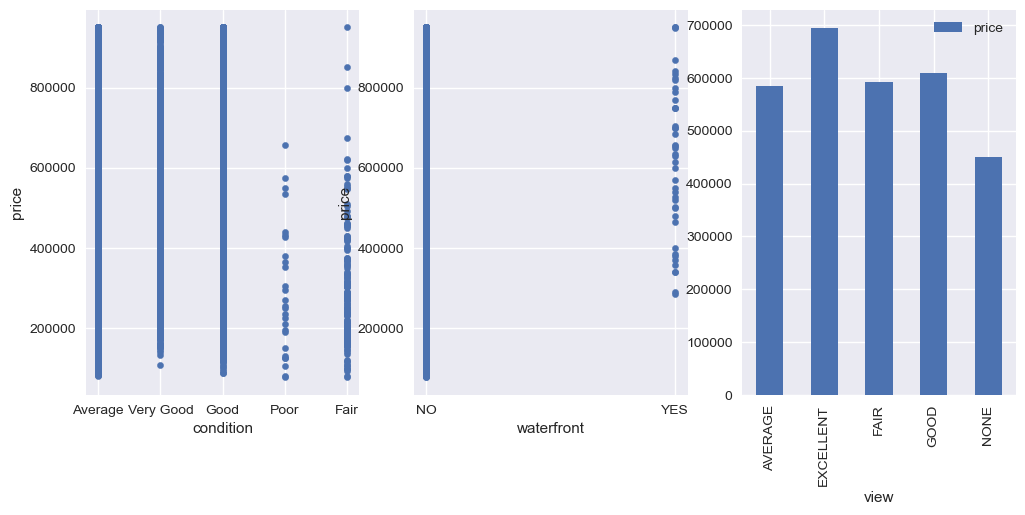

In [79]:
##dealing with categorical values
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

df.plot.scatter(x="condition", y="price", ax=ax1)
#df.plot.scatter(x="view", y="price", ax=ax2)
df.groupby("view").mean().plot.bar(y="price", ax=ax3)
df.plot.scatter(x="waterfront", y="price",ax=ax2)

### From our visualizations we can see,that  most houses have no waterfront and also among views a high percentage of houses have no view.so we will use condition as our main  categorical variable

In [80]:
# we will use condition
# most houses have no views
y=df['log_price']
X_hot=df[['sqft_living','grade_num','lat','bathrooms','bedrooms','floors','condition']]


## ONE HOT ENCODING 

In [81]:
X_hot = pd.get_dummies(X_hot, columns=["condition"], drop_first=True)
X_hot

,sqft_living,grade_num,lat,bathrooms,bedrooms,floors,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,7,47.5112,1.00,3,1.0,0,0,0,0
1,2570,7,47.7210,2.25,3,2.0,0,0,0,0
2,770,6,47.7379,1.00,2,1.0,0,0,0,0
3,1960,7,47.5208,3.00,4,1.0,0,0,0,1
4,1680,8,47.6168,2.00,3,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21592,1530,8,47.6993,2.50,3,3.0,0,0,0,0
21593,2310,8,47.5107,2.50,4,2.0,0,0,0,0
21594,1020,7,47.5944,0.75,2,2.0,0,0,0,0
21595,1600,8,47.5345,2.50,3,2.0,0,0,0,0


In [82]:
model3 = sm.OLS(y, sm.add_constant(X_hot))
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3599.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:28:25   Log-Likelihood:                -944.42
No. Observations:               19704   AIC:                             1911.
Df Residuals:                   19693   BIC:                             1998.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -55.7624      0.609    -91.538      0.000     -56.956     -54.568
sqft_living             0.0002   4.37e-06     48.389      0.000       0.000       0.000
grade_num               0.1387      0.003     50.613      0.000       0.133       0.144
lat                     1.4137      0.013    110.186      0.000       1.389       1.439
bathrooms               0.0139      0.004      3.367      0.001       0.006       0.022
bedrooms               -0.0170      0.003     -6.373      0.000      -0.022      -0.012
floors                  0.0209      0.004      5.001      0.000       0.013       0.029
condition_Fair         -0.1147      0.020     -5.622      0.000      -0.155      -0.075
condition_Good          0.0925      0.004     21.049      0.000       0.084       0.101
condition_Poor         -0.1522      0.049     -3.103      0.002      -0.248      -0.056
condition_Very Good     0.1728      0.007     24.105      0.000       0.159       0.187
==============================================================================
Omnibus:                      236.251   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.567
Skew:                           0.069   Prob(JB):                     3.83e-88
Kurtosis:                       3.687   Cond. No.                     7.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


All of the coefficients are statistically significant with a p_value of less than 0.05
Our model is statistically significant with f(p_value) of less than 0.05

- Holding all other factors constant an increase in sqft_living  by one unit increases the price by 0.02%
- Holding all other factors constant an increase in grade_num  by one unitincreases the price by  around 13.87%
- Holding all other factors constant an increase in latitude by one unit increases the price by around 14.137%
- Holding all other factors constant an increase in bathrooms by one unit increases the price by around 1.39%
- Holding all other factors constant an increase in bedrooms by one unit reduces the price by around 1.70%
- Holding all other factors  constant an increase in floors by one unit increases the price by around 2%
- Holding all other factors  constant  when the  house condition is fair the price reduces by 11.47%
- Holding all other factors  constant  when the  house condition is good  the price increases by 9.25%
- Holding all other factors  constant  when the  house condition is poor the price reduces by 15.22 %
-  Holding all other factors  constant  when the  house condition is very good the price increases by 17.28%


In [83]:
# mean absolute error
results3.resid.abs()
mae = results3.resid.abs().sum() / len(y)
mae

0.19761841137544184

After incorprating condition as our categorical variable,we van see that our model has an improved R of about  64.6 and that the skewness is 0.0069 which is close to 0.065  hence we are confident with this model and the mean squared error   has reduced to around 0.19


### checking for normality using QQ plot

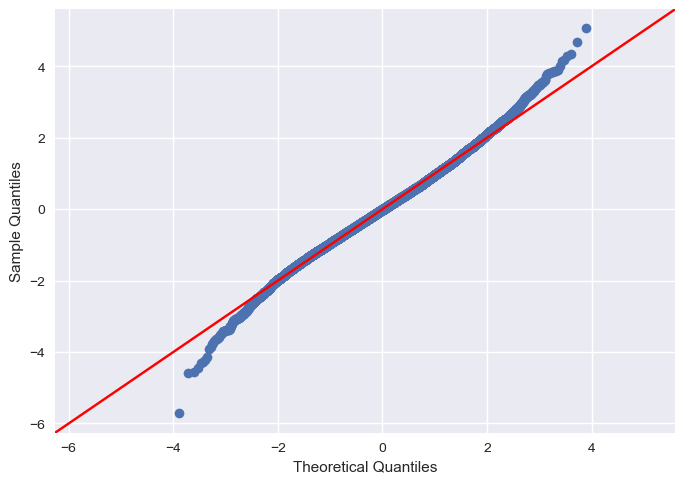

In [84]:
results3.resid
sm.graphics.qqplot(results3.resid, dist=stats.norm, line='45', fit=True)
plt.show()

 We can see that our  model follows a normal distribution

### Looking for homoskedasticity
$/H_0/$ Heteroskedasticity is not present

$/H_1/$ Heteroskedasticity is present

In [85]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results3.resid, model3.exog)
list(zip(name, test))

[('F statistic', 0.9327128724622157), ('p-value', 0.9997245030638767)]

We can see that p_value is greater than 0.05 hence we do not reject our null hypothesis and conclude that Hetereskedasticity is not present

## Interpreting our models

### Which variable/aspect has the highest  impacct on price?
 - we can see that our grade has a high impact on price because it is mostly correlated with price

 ### Which other variables impact our prices?
  - we can see that sqft_living,sqft_living15,lat and bathrooms are among other variables  that influences our prices 
 ### Which model gives the highest variation/accuracy that will help us predict prices in the future?
  - MODEL4 gives because  Grade, sqft_living,,latitude,floors,condition  and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features include

## CONCLUSION
We can see that the house grade is one of the main features that is affecting price,so buyers and sellers should expect a high price for quality houses based on grade and houses with low grade have low value .
Sqft _living,lattitude and bathrooms also have a postive impact on our price,it seems houses with big sqft_living and bathrooms increases the prices.
condition also affects our price in both positive and negative,when the condition is poor and fair the price of the houses reduces but when the house  condition is good and very_good  the price is high.
Our model has some limitations due to removal of outliers and tranforming some of our prices,hence it may not be accurate in different.
Further analysis concerning the housing sector in kings county needs to be done to bring more clarity on the prices of our houses